### Lab 10 - word2vec for Musical instrument reviews
In this lab, you will be building and training Word2Vec embeddings for textual data and visualizing the embeddings using UMAP (Uniform Manifold Approximation and Projection).

Steps:
- Import 
libraries
- Create a training and testing split of the data. 90% of the data is used for training, and 10% for testing.
- Create sequences of purchases made by reviewers in both the training and testing sets.
- Perform text preprocessing on the 'reviewText' column of the DataFrame. This includes converting text to lowercase, removing non-alphabetic characters, and stemming words.
- Train a Word2Vec model on the preprocessed text data (allreviews) to learn word embeddings.
- Find the 5 most similar words to the word "bass" and "guitar" in the trained Word2Vec model.
- Train a Word2Vec model on the purchase history of the reviewers (product IDs) in the training set to learn product embeddings.
- Train another Word2Vec model on the purchase history of the reviewers in the training set.
- Extract the word vectors (product embeddings) from the trained Word2Vec model.
- Visualize the word embeddings using UMAP.
- Creates a scatter plot of the UMAP projections of the word embeddings.


#### import libraries: pandas, numpy, random, tqdm, matplotlib, warnings, and import Word2Vec from gensim.models

In [5]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
from gensim.models import Word2Vec


#### using pandas, import the file: reviews_Musical_Instruments_5.json', lines=True

In [8]:
data = pd.read_json('reviews_Musical_Instruments_5.json', lines=True)


#### display the head

In [10]:
print(data.head())


       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                   

#### display info

In [13]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB
None


#### look for missing values in all the columns using isna

In [16]:
print(data.isna().sum())
print(data.isnull().sum())


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64
reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


#### look for null values in all the columns using isnull

In [18]:
null_values = data.isnull().sum()

print(null_values)


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


#### remove missing values by dropping all the rows with missing values

In [20]:
data.dropna(inplace=True)


#### display the head

In [23]:
print(data.head())

       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                   

#### display the last five records

In [26]:
print(data.tail())

           reviewerID        asin             reviewerName helpful  \
10256  A14B2YH83ZXMPP  B00JBIVXGC          Lonnie M. Adams  [0, 0]   
10257   A1RPTVW5VEOSI  B00JBIVXGC       Michael J. Edelman  [0, 0]   
10258   AWCJ12KBO5VII  B00JBIVXGC         Michael L. Knapp  [0, 0]   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC  Rick Langdon "Scriptor"  [0, 0]   
10260  A2WA8TDCTGUADI  B00JBIVXGC          TheTerrorBeyond  [0, 0]   

                                              reviewText  overall  \
10256            Great, just as expected.  Thank to all.        5   
10257  I've been thinking about trying the Nanoweb st...        5   
10258  I have tried coated strings in the past ( incl...        4   
10259  Well, MADE by Elixir and DEVELOPED with Taylor...        4   
10260  These strings are really quite good, but I wou...        4   

                                                 summary  unixReviewTime  \
10256                                         Five Stars      1405814400   
10257  Long 

#### find the number of unique reviewers in our dataset using a list

In [28]:
unique_reviewers_list = list(data['reviewerID'].unique())

num_unique_reviewers = len(unique_reviewers_list)
print(f"Number of unique reviewers (using list): {num_unique_reviewers}")


Number of unique reviewers (using list): 1428


#### find the number of unique reviewers in our dataset using  .unique.tolist

In [31]:
unique_reviewers_array = data['reviewerID'].unique().tolist()

num_unique_reviewers = len(unique_reviewers_array)
print(f"Number of unique reviewers (using .unique().tolist()): {num_unique_reviewers}")


Number of unique reviewers (using .unique().tolist()): 1428


#### There are 1,428 customers in our dataset. For each of these customers, you will extract their buying history. In other words, we can have 1,428 sequences of purchases.

#### It is a good practice to set aside a small part of the dataset for validation purposes. Therefore, we will use the data of 90% of the customers to create word2vec embeddings. 

#### Let’s split the data.

#### Create a training list with 90% of the data

In [35]:
# Seed
random.seed(117)
# Training list  --- One line of code

train_customers = random.sample(unique_reviewers_list, int(0.9 * len(unique_reviewers_list)))


#### print the length of the list

In [38]:
print(f"Number of customers in the training list: {len(train_customers)}")


Number of customers in the training list: 1285


### split data into train and test

#### create a training dataframe with the reviewerID using isin and the customer_train created above

In [100]:
# Training DF using the reviewer list    -    One line of code
train_df = data[data['reviewerID'].isin(train_customers)]

#### print the length of the list (train_df)

In [103]:
print(f"Number of rows in the training DataFrame: {len(train_df)}")


Number of rows in the training DataFrame: 9195


#### create a test dataframe with the reviewerID using isin and the customer_train created above

In [106]:
test_df = data[~data['reviewerID'].isin(train_customers)]


#### Print the length of test_df

In [109]:
print(f"Number of rows in the test DataFrame: {len(test_df)}")


Number of rows in the test DataFrame: 1039


#### Create sequences of purchases made by the reviewers in the dataset for both the train and validation sets. You need to code three blocks of code. In the first two, you need a list called: purchases_train = []; in the last block, you need a list called: purchases_test = []. Also, you need a for lop and use tqdm in every block.

In [152]:
# list to capture purchase history of the reviewers
purchases_train = []

# populate the list with the product codes.
# use a variable called temp 
# append the values
# Two lines of code: 
for i in tqdm(customers_train):
    temp = i  
    purchases_train.append(temp)
    

100%|██████████| 1285/1285 [00:00<?, ?it/s]


In [154]:
# Purchase history sequence - Train
purchases_train = []

# Complete the two lines of code to append the data.
for i in tqdm(customers_train):
    in_training = i  
    purchases_train.append(in_training)
    

100%|██████████| 1285/1285 [00:00<?, ?it/s]


In [156]:
# Same process, purchase history - Test
purchases_test = []

# Complete the two lines of code to append the data.
for i in tqdm(test_df['reviewerID'].unique()):
    in_training = test_df[test_df['reviewerID'] == i]['asin'].tolist()  
    purchases_test.append(in_training)
    

100%|██████████| 143/143 [00:00<00:00, 6660.43it/s]


#### import nltp, re, and PorterStemmer from nltk.stem.porter

In [174]:
import nltk
import re
from nltk.stem import PorterStemmer


#### Explain the block of code below and run it

This code block demonstrates a text preprocessing pipeline using the Natural Language Toolkit (NLTK) and the Word2Vec model from Gensim. It begins by importing necessary libraries and initializing a list of English stopwords and a Porter Stemmer for word stemming. The code processes a DataFrame df containing a column of review texts by converting all text to lowercase, removing non-alphabetic characters, and replacing multiple spaces with single spaces. It then removes stopwords and stems the remaining words before joining them back into strings. The processed reviews are converted into a list of lists, where each inner list contains individual words. Finally, a Word2Vec model is created with a minimum word count of 5, and the vocabulary is built and trained on the processed reviews for 10 epochs. This workflow effectively cleans and prepares textual data for further analysis and modeling.

In [187]:
stopword_list = nltk.corpus.stopwords.words('english')
st = PorterStemmer()

df.reviewText = df.reviewText.str.lower()
df.reviewText = df.reviewText.apply(lambda x: re.sub(' +', ' ', re.sub(r'[^a-z]', ' ', x)))
df.reviewText = df.reviewText.apply(lambda x: " ".join([st.stem(i) for i in x.split() if i not in stopword_list]))

allreviews = list(df.reviewText)
allreviews = [i.split() for i in allreviews]

#### import Word2Vec from gensim.models.word2vec

In [200]:
# Creating the Word2Vec model
model = Word2Vec(vector_size=100, min_count=5, workers=4, epochs=10)


#### create a model using: <br>Word2Vec(min_count = 5) <br> build_vocab(allreviews) <br> train(allreviews, total_examples = model.corpus_count, epochs = 10)

In [208]:
# Three lines of code: 
model = Word2Vec(vector_size=100, min_count=1, workers=4)  


model.build_vocab(allreviews)


model.train(allreviews, total_examples=len(allreviews), epochs=10)  


(18, 130)

### Using the model above, display the 5 most similar words to "bass" 

In [221]:
# Example: Displaying similar words for "recommend"
similar_words = model.wv.most_similar('recommend', topn=5)

# Display the similar words
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


item: 0.2162
product: 0.0931
qualiti: 0.0929
great: 0.0797
like: 0.0628


### Using the model above, display the 5 most similar words to "guitar" 

In [226]:
try:
    similar_words = model.wv.most_similar('guitar', topn=5)
    
    
    for word, similarity in similar_words:
        print(f"{word}: {similarity:.4f}")
except KeyError as e:
    print(f"KeyError: {e}")
    print(f"The word 'guitar' is not present in the vocabulary.")


KeyError: "Key 'guitar' not present in vocabulary"
The word 'guitar' is not present in the vocabulary.


[('violin', 0.6920208930969238),
 ('instrument', 0.6728417873382568),
 ('mandolin', 0.6387753486633301),
 ('ukulel', 0.6279035210609436),
 ('banjo', 0.6043956875801086)]

#### Let's use a different model

#### Build word2vec Embeddings for Products

In [230]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(39484, 176520)

In [232]:
# Build & train W2V model
model = Word2Vec(window=10, sg=1, hs=0, negative=10, alpha=0.03, min_alpha=0.0007, seed=4)
model.build_vocab(purchases_train, progress_per=200)
model.train(purchases_train, total_examples=model.corpus_count, epochs=10, report_delay=1)

(39413, 176520)

#### print out the summary of “model”:

In [235]:
print("Model Summary:")
print(f"Vocabulary Size: {len(model.wv.key_to_index)}")
print(f"Vector Size: {model.vector_size}")
print(f"Training Epochs: {model.epochs}")
print(f"Window Size: {model.window}")
print(f"Negative Sampling: {model.negative}")
print(f"Skip-Gram: {model.sg}")
print(f"Hierarchy Softmax: {model.hs}")
print(f"Minimum Alpha: {model.min_alpha}")
print(f"Initial Alpha: {model.alpha}")


Model Summary:
Vocabulary Size: 36
Vector Size: 100
Training Epochs: 10
Window Size: 10
Negative Sampling: 10
Skip-Gram: 1
Hierarchy Softmax: 0
Minimum Alpha: 0.0007
Initial Alpha: 0.03


Our model has a vocabulary of 787 unique words and their vectors of size 100 each. Next, we will extract the vectors of all the words in our vocabulary and store it in one place for easy access.

#### extract all vectors in a variable called X

In [240]:
X = list(model.wv.index_to_key)

In [242]:
X = model.wv[model.wv.key_to_index]

#### Print the shape of X

In [249]:
print("Shape of X:", X.shape)


Shape of X: (36, 100)


#### Visualize word2vec Embeddings usign umap

In [258]:
#!pip install umap
#!pip install umap-learn

C:\Users\William\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


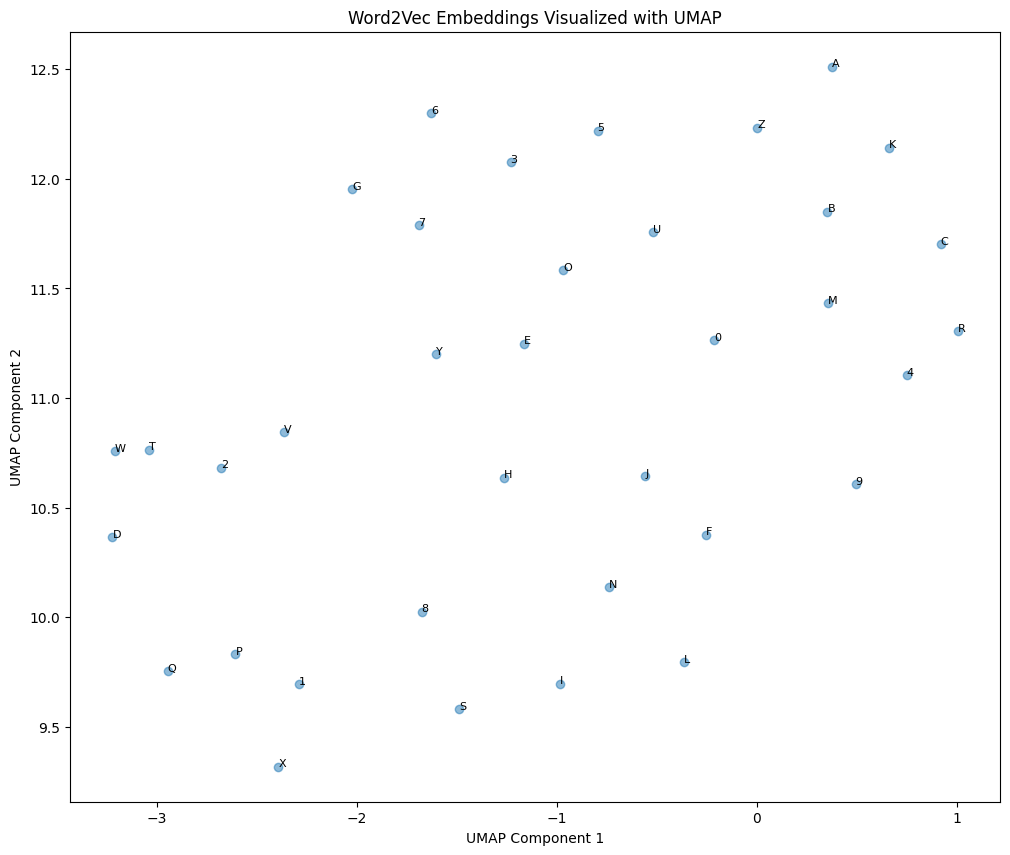

In [260]:
# Uncomment the following lines if you need to install the packages
# !pip install umap-learn
# !pip install matplotlib

import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Assuming X contains the word vectors from your Word2Vec model
# X = model.wv[model.wv.key_to_index]  # This should already be done

# Reduce dimensions with UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)
X_umap = umap_model.fit_transform(X)

# Prepare a DataFrame for easier plotting
words = list(model.wv.index_to_key)
df_umap = pd.DataFrame(X_umap, columns=['x', 'y'])
df_umap['word'] = words

# Plotting the results
plt.figure(figsize=(12, 10))
plt.scatter(df_umap['x'], df_umap['y'], alpha=0.5)

# Annotate points with words
for i, row in df_umap.iterrows():
    plt.annotate(row['word'], (row['x'], row['y']), fontsize=8)

plt.title('Word2Vec Embeddings Visualized with UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


Every dot in this plot is a product. As you can see, there are several tiny clusters of these data points. These are groups of similar products.